<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to 
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

#Refernce: I worked with Boris and Berenger 

## 1. Load the data from file

---

In [2]:
iowa = pd.read_csv('C:\\Users\\Shiv\\Desktop\\ECON628-01-spgunjal\\mid_term\\Iowa_Liquor_sales_sample_10pct.csv', parse_dates=[0])

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
iowa.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,31.000000,1.012200e+06,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,62.000000,1.031200e+06,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,77.000000,1.062310e+06,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


In [4]:
print iowa.shape
print iowa.info()

(270955, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtype

In [5]:
#before cleaning the columns I am renaming the columns so that it becomes easy to call spesific columns as an 
#when required
iowa.rename(columns={
    'Date':'date',
    'Store Number':'store_no',
    'City':'city',
    'Zip Code':'zip_code',
    'County Number':'county_no', 
    'County':'county', 
    'Category':'category', 
    'Category Name':'category_name', 
    'Vendor Number':'vendor_no', 
    'Item Number':'item_no', 
    'Item Description':'item_description', 
    'Bottle Volume (ml)':'bottle_volume_ml', 
    'State Bottle Cost':'state_bottle_cost', 
    'State Bottle Retail':'state_bottle_retail',
    'Bottles Sold':'bottles_sold', 
    'Sale (Dollars)':'sale_dollars', 
    'Volume Sold (Liters)':'volume_sold_liters',
    'Volume Sold (Gallons)':'volume_sold_gallons'
    }, inplace=True)


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [6]:
#checking the variable info to identify the columns which needs to be converted/cleaned
print iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
date                   270955 non-null datetime64[ns]
store_no               270955 non-null int64
city                   270955 non-null object
zip_code               270955 non-null object
county_no              269878 non-null float64
county                 269878 non-null object
category               270887 non-null float64
category_name          270323 non-null object
vendor_no              270955 non-null int64
item_no                270955 non-null int64
item_description       270955 non-null object
bottle_volume_ml       270955 non-null int64
state_bottle_cost      270955 non-null object
state_bottle_retail    270955 non-null object
bottles_sold           270955 non-null int64
sale_dollars           270955 non-null object
volume_sold_liters     270955 non-null float64
volume_sold_gallons    270955 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), objec

In [7]:
#checking missing values to decide how to deal with the issue of missing values
iowa.isnull().sum()

date                      0
store_no                  0
city                      0
zip_code                  0
county_no              1077
county                 1077
category                 68
category_name           632
vendor_no                 0
item_no                   0
item_description          0
bottle_volume_ml          0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liters        0
volume_sold_gallons       0
dtype: int64

As we can see County number and County name have equal amount of missing values which means that we are probably missing both of these values for same observations. We need to use an 

### 3.2 Clean the columns

there are many missing values in County and county numbers
to overcome this problem I fetch the County name from other observation if the city is same 
before doing so I drop some observations where one city has multiple counties
making a copy of the data

In [8]:
df = iowa.copy(deep = True)

In [9]:
#Sorting the dataset to check for the missing values
df_sorted = df.sort(['city', 'county'], ascending=[0,1])
df_sorted.head(10)

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
4976,2015-06-15,4885,ZWINGLE,52079,49.0,Jackson,1031080.0,VODKA 80 PROOF,297,35926,Five O'clock PET Vodka,750,$3.37,$5.06,24,$121.44,18.00,4.76
6594,2015-12-14,4885,ZWINGLE,52079,49.0,Jackson,1012300.0,IRISH WHISKIES,370,15644,Jameson,375,$6.74,$10.11,3,$30.33,1.12,0.30
12535,2015-10-05,4885,ZWINGLE,52079,49.0,Jackson,1031080.0,VODKA 80 PROOF,300,36903,Mccormick Vodka,200,$1.13,$1.70,48,$81.60,9.60,2.54
15360,2015-10-05,4885,ZWINGLE,52079,49.0,Jackson,1081600.0,WHISKEY LIQUEUR,421,64864,Fireball Cinnamon Whisky,375,$5.33,$8.00,24,$192.00,9.00,2.38
21035,2015-06-15,4885,ZWINGLE,52079,49.0,Jackson,1062300.0,FLAVORED RUM,35,43136,Bacardi Limon,750,$8.26,$12.39,4,$49.56,3.00,0.79
35597,2016-03-14,4885,ZWINGLE,52079,49.0,Jackson,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65254,Jagermeister Liqueur,375,$6.52,$9.78,24,$234.72,9.00,2.38
36333,2016-02-01,4885,ZWINGLE,52079,49.0,Jackson,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,3,$51.72,2.25,0.59
37372,2015-05-18,4885,ZWINGLE,52079,49.0,Jackson,1032080.0,IMPORTED VODKA,370,34003,Absolut Swedish Vodka 80 Prf,200,$3.99,$5.99,6,$35.94,1.20,0.32
38674,2015-03-02,4885,ZWINGLE,52079,49.0,Jackson,1081600.0,WHISKEY LIQUEUR,421,64864,Fireball Cinnamon Whisky,375,$5.33,$8.00,24,$192.00,9.00,2.38
48660,2015-09-14,4885,ZWINGLE,52079,49.0,Jackson,1062310.0,SPICED RUM,259,43026,Admiral Nelson Spiced Rum,750,$5.78,$8.67,12,$104.04,9.00,2.38


Grouping the data by city and county to see which cities have more than one counties with the count of counties 
which I'll use to decide which ones need to be dropped by matching it with number of observations for each of such
county.

In [10]:
pd.set_option('display.max_rows', 10)
df.groupby(['city', 'county'])[['county_no']].count() 

county_no
city      county             
ACKLEY    Hardin           57
          Webster          34
ADAIR     Adair            43
ADEL      Dallas          318
AFTON     Union            12
...                       ...
WINTERSET Madison         782
WINTHROP  Buchanan         53
WOODBINE  Harrison        155
WOODWARD  Dallas           35
ZWINGLE   Jackson          53

[393 rows x 1 columns]

In [11]:
#the following cities have multiple counties so retreiving the count for each of them
print df[df["city"]=='ACKLEY'].count()["city"]
print df[df["city"]=='BETTENDORF'].count()["city"]
print df[df["city"]=='CLIVE'].count()["city"]
print df[df["city"]=='CORNING'].count()["city"]
print df[df["city"]=='FORT DODGE'].count()["city"]
print df[df["city"]=='NEWTON'].count()["city"]
print df[df["city"]=='NORTH LIBERTY'].count()["city"]
print df[df["city"]=='OSKALOOSA'].count()["city"]
print df[df["city"]=='PERRY'].count()["city"]
print df[df["city"]=='STATE CENTER'].count()["city"]
print df[df["city"]=='WEST DES MOINES'].count()["city"]

105
3709
935
444
2989
2544
1321
1516
815
170
7162


It is visible from number of missing observations that  both county and county number variables have 1077 missing values, but I wanted to make sure that both variables are missing for same observations.
The reason for that is that county is a categorical variable so I can't replace missing values with mean, median or any other value. 
SO, I will assign number/character to missing value and name of the county based on the city, since variable city doesn't have any missing values. For example, if the city is Adel and that city belongs to Dallas , any time we have city Adel and missing value for county, we can conclude that county is Dallas and we should assingn that name of the county and corresponding county number to those missing values. 
Issues:
By exploring the dataset, I found that there are some cities that belong to 2 counties, so I wouldn't be able to precisely assign the county based on the city, so I will just drop those missing values that belong to those cities. Fortunately, there is only 34 such missing values. First, I explored the dataset by making a table that shows counties per city. Then I wrote down these cities. Next, I counted the number of observations of counties within these cities and compared it to total count of observations of those cities. Difference are missing values of counties within those cities. Next, I located those missing values, dropped them, and proceeded with my idea.
There are some cities that have all missing values for counties, so we don't know to which county those cities belong. Again, I am simply going to drop these missing values. Fortunately, there is only 12 such missing values.

In [12]:
#filling the missing values
#first I fill these missing vlues by a sort of an identifier that can be used to set the condition for replacing missing values

df['county'].fillna("shiv", inplace=True)

df.isnull().sum()

date                      0
store_no                  0
city                      0
zip_code                  0
county_no              1077
                       ... 
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liters        0
volume_sold_gallons       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
date                   270955 non-null datetime64[ns]
store_no               270955 non-null int64
city                   270955 non-null object
zip_code               270955 non-null object
county_no              269878 non-null float64
county                 270955 non-null object
category               270887 non-null float64
category_name          270323 non-null object
vendor_no              270955 non-null int64
item_no                270955 non-null int64
item_description       270955 non-null object
bottle_volume_ml       270955 non-null int64
state_bottle_cost      270955 non-null object
state_bottle_retail    270955 non-null object
bottles_sold           270955 non-null int64
sale_dollars           270955 non-null object
volume_sold_liters     270955 non-null float64
volume_sold_gallons    270955 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), objec

In [14]:
#there are three cities namely Ackley, Fort Dodge and North Liberty where I can not replace the missing values
#since they migh get assigned to incorrect county as both County name and COunty number are missing, so I am 
#dropping these observations from the dataset
df = df[(df['county'] != "shiv") | (df['city'] != "ACKLEY")]
df = df[(df['county'] != "shiv") | (df['city'] != "FORT DODGE")]
df = df[(df['county'] != "shiv") | (df['city'] != "NORTH LIBERTY")]
df.isnull().sum()

date                      0
store_no                  0
city                      0
zip_code                  0
county_no              1043
                       ... 
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liters        0
volume_sold_gallons       0
dtype: int64

In [15]:
#checking the count again
print df[df["city"]=='ACKLEY'].count()["city"]
print df[df["city"]=='BETTENDORF'].count()["city"]
print df[df["city"]=='CLIVE'].count()["city"]
print df[df["city"]=='CORNING'].count()["city"]
print df[df["city"]=='FORT DODGE'].count()["city"]
print df[df["city"]=='NEWTON'].count()["city"]
print df[df["city"]=='NORTH LIBERTY'].count()["city"]
print df[df["city"]=='OSKALOOSA'].count()["city"]
print df[df["city"]=='PERRY'].count()["city"]
print df[df["city"]=='STATE CENTER'].count()["city"]
print df[df["city"]=='WEST DES MOINES'].count()["city"]

91
3709
935
444
2983
2544
1307
1516
815
170
7162


In [16]:
#replacing the unique identifier used to drop specific missing values
df.replace("shiv", np.nan, inplace=True)
df.isnull().sum()

date                      0
store_no                  0
city                      0
zip_code                  0
county_no              1043
                       ... 
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liters        0
volume_sold_gallons       0
dtype: int64

In [17]:
#now I have one county per one city or atleast one variable either county or county no which can be used
#as a reference to replace the missing values
df['county'] = df.groupby('city')['county'].transform('first')
df['county_no'] = df.groupby('city')['county_no'].transform('first')

df.isnull().sum()

date                    0
store_no                0
city                    0
zip_code                0
county_no              12
                       ..
state_bottle_retail     0
bottles_sold            0
sale_dollars            0
volume_sold_liters      0
volume_sold_gallons     0
dtype: int64

I wanted to make sure that we are talking about same categories, so I checked if category number matches category 
name. Now I am going to do same thing I did for missing values for counties. Since category has 68 missing values
and category name has 632 missing values, I am going to group them by variable with less missing values, which is 
"category". Then I will replace missing values for category name with first non-missing value from the group, based 
on category number.`
again I am using the same methodology used in the case of missing county and county numbers
replacing the missing values by unique values which can be used to set the condition for replacing

In [18]:
df.category.fillna(9999, inplace=True)
df.isnull().sum()


date                    0
store_no                0
city                    0
zip_code                0
county_no              12
                       ..
state_bottle_retail     0
bottles_sold            0
sale_dollars            0
volume_sold_liters      0
volume_sold_gallons     0
dtype: int64

In [19]:

df = df[df.category !=9999]
df.isnull().sum()

date                    0
store_no                0
city                    0
zip_code                0
county_no              12
                       ..
state_bottle_retail     0
bottles_sold            0
sale_dollars            0
volume_sold_liters      0
volume_sold_gallons     0
dtype: int64

In [20]:
#converting the category to integers from floats
df.category = [int(float(x)) for x in df.category]

In [21]:
#creating category name after replacing the missing values in main data set
df['category_name'] = df.groupby('item_no')['category_name'].transform('first')
df.isnull().sum()

date                    0
store_no                0
city                    0
zip_code                0
county_no              12
                       ..
state_bottle_retail     0
bottles_sold            0
sale_dollars            0
volume_sold_liters      0
volume_sold_gallons     0
dtype: int64

In [22]:
#dropping observations which can be replaced by using the above mentioned method
df.dropna(axis=0, inplace=True)
df.isnull().sum()

date                   0
store_no               0
city                   0
zip_code               0
county_no              0
                      ..
state_bottle_retail    0
bottles_sold           0
sale_dollars           0
volume_sold_liters     0
volume_sold_gallons    0
dtype: int64

In [23]:
#Getting rid of the $ and converting the variables to appropriate type and format

df['state_bottle_cost'] = df['state_bottle_cost'].map(lambda x: x.lstrip('$'))
df['state_bottle_retail'] = df['state_bottle_retail'].map(lambda x: x.lstrip('$'))
df['sale_dollars'] = df['sale_dollars'].map(lambda x: x.lstrip('$'))

In [24]:
#converting strings to floats as I'll need these columns in numeric form to carryout calculations
df.state_bottle_cost = [float(str(x)) for x in df.state_bottle_cost]
df.state_bottle_retail = [float(str(x)) for x in df.state_bottle_retail]
df.sale_dollars = [float(str(x)) for x in df.sale_dollars]
df.county_no = [int(float(x)) for x in df.county_no]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270831 entries, 0 to 270954
Data columns (total 18 columns):
date                   270831 non-null datetime64[ns]
store_no               270831 non-null int64
city                   270831 non-null object
zip_code               270831 non-null object
county_no              270831 non-null int64
county                 270831 non-null object
category               270831 non-null int64
category_name          270831 non-null object
vendor_no              270831 non-null int64
item_no                270831 non-null int64
item_description       270831 non-null object
bottle_volume_ml       270831 non-null int64
state_bottle_cost      270831 non-null float64
state_bottle_retail    270831 non-null float64
bottles_sold           270831 non-null int64
sale_dollars           270831 non-null float64
volume_sold_liters     270831 non-null float64
volume_sold_gallons    270831 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(7), object


### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

Using boxplots to look for outliers to set criteria for dropping some of them
I'll look at number of bottles sold as all other variables like the cost and price will be used in combination
with this variable to calculate total cost and total volume sold

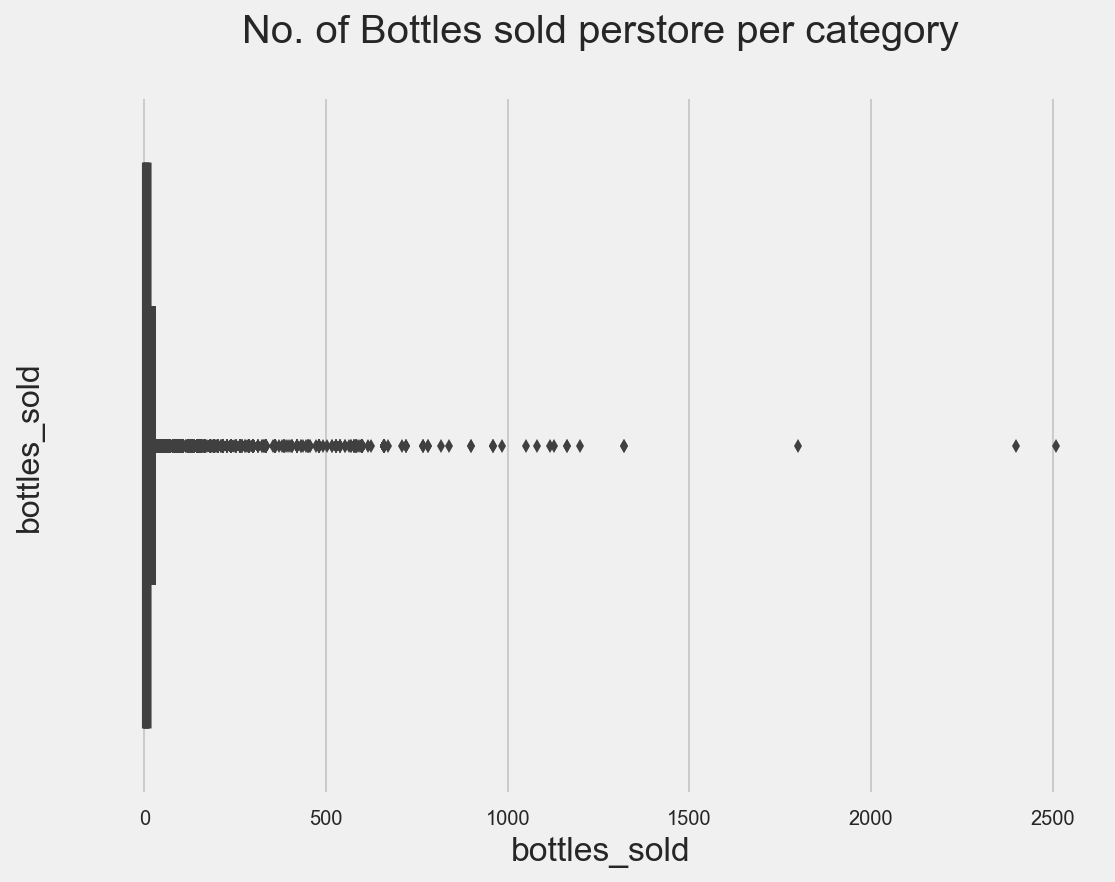

In [26]:

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.bottles_sold, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('bottles_sold\n', fontsize=16)
ax.set_title('No. of Bottles sold perstore per category\n', fontsize=20)

plt.show()

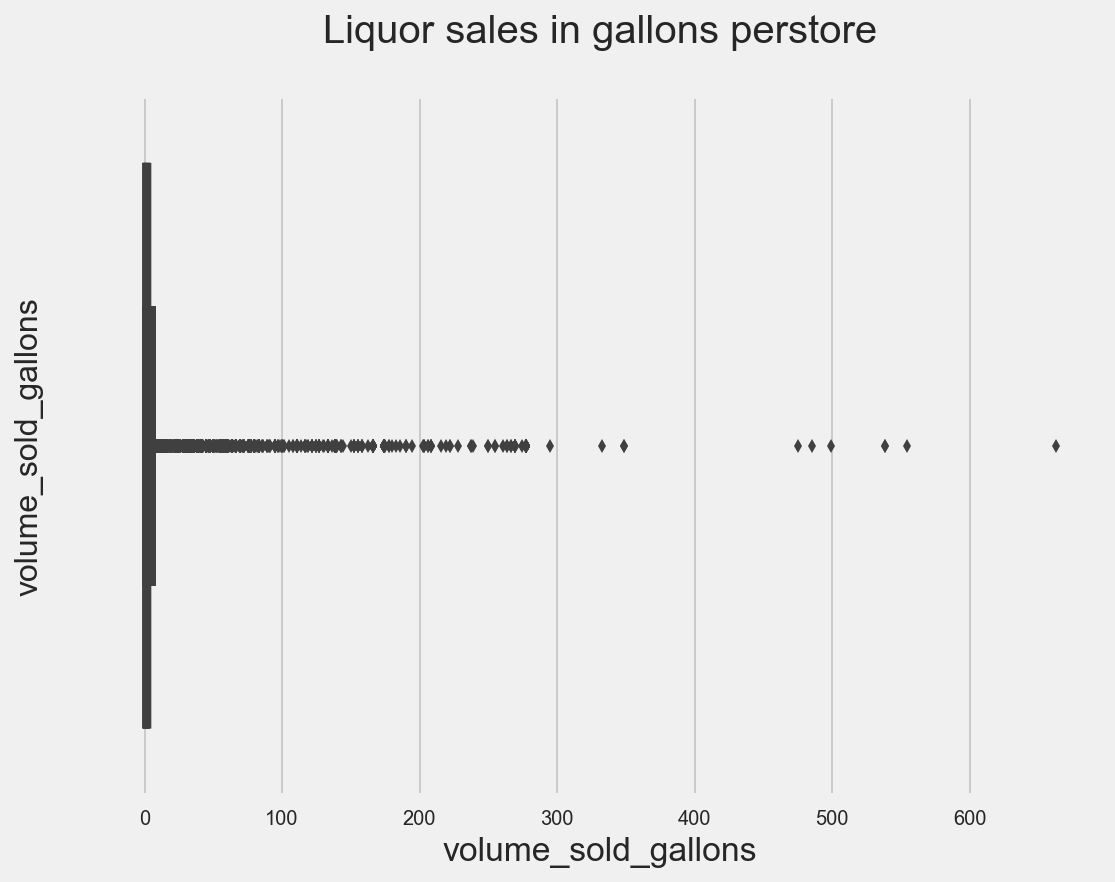

In [27]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.volume_sold_gallons, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('volume_sold_gallons\n', fontsize=16)
ax.set_title('Liquor sales in gallons perstore\n', fontsize=20)

plt.show()

In [28]:
#keeping observations that are within standard deviation of 5
#Ref: http://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-dataframe
dff = df[((df.bottles_sold - df['bottles_sold'].mean()) / df['bottles_sold'].std()).abs() < 5]

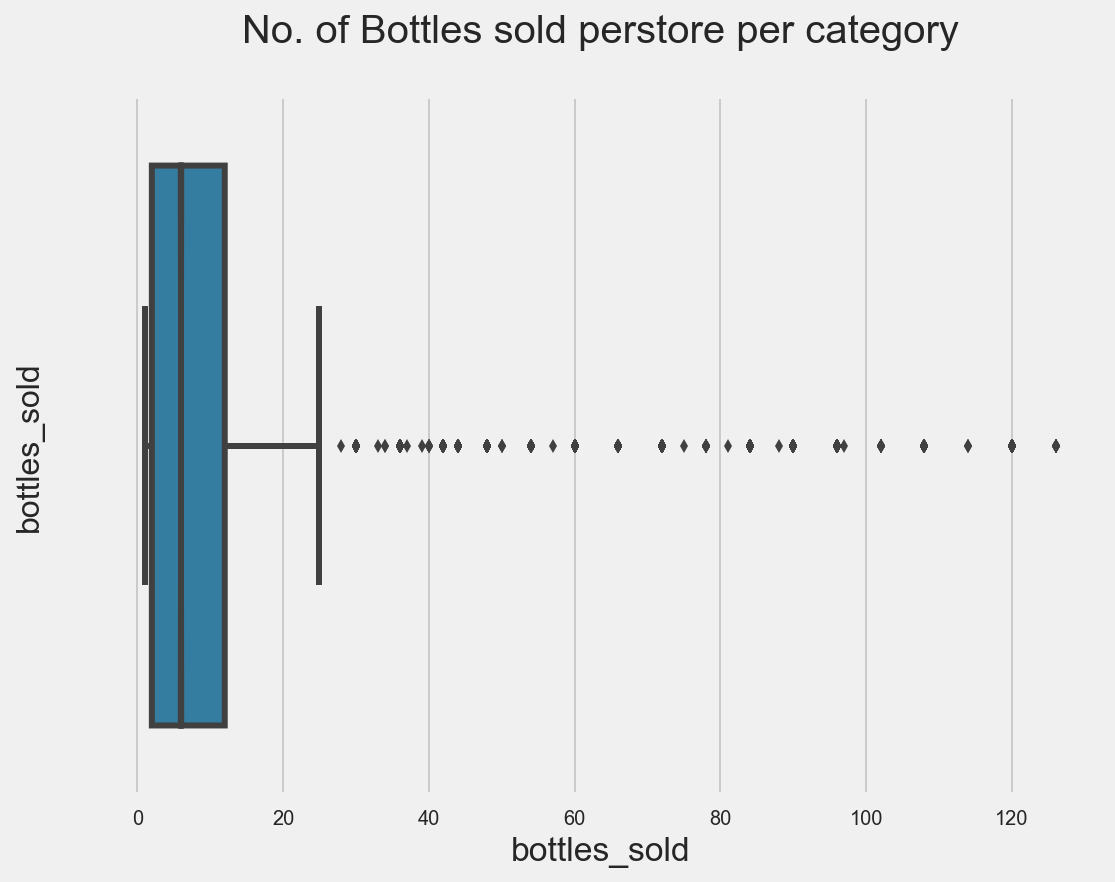

In [29]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(dff.bottles_sold, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('bottles_sold\n', fontsize=16)
ax.set_title('No. of Bottles sold perstore per category\n', fontsize=20)

plt.show()

Now we can see that the data looks much better than the original one also since we have omitted outliers for 
bottles sold which hopefully will also result in reduces dispersion of data in other variables as well
checking the samme for valume sold in gallons

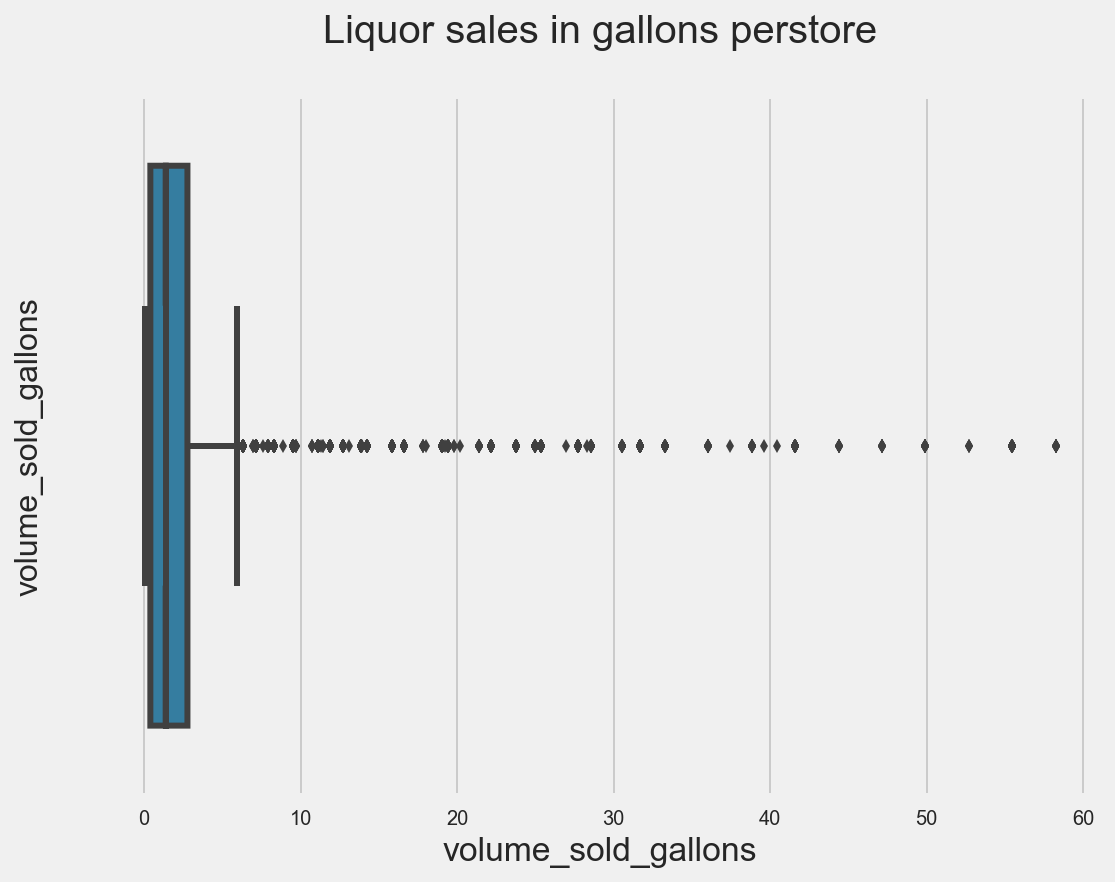

In [30]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(dff.volume_sold_gallons, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('volume_sold_gallons\n', fontsize=16)
ax.set_title('Liquor sales in gallons perstore\n', fontsize=20)

plt.show()

In [31]:
dff.head(2)

,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82,Scott,1011100,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40


In [32]:
#We can clearly see that previously the range for volume sold was from 0 to 600 no its restricted to 60
#cheecking how many observations were dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270831 entries, 0 to 270954
Data columns (total 18 columns):
date                   270831 non-null datetime64[ns]
store_no               270831 non-null int64
city                   270831 non-null object
zip_code               270831 non-null object
county_no              270831 non-null int64
county                 270831 non-null object
category               270831 non-null int64
category_name          270831 non-null object
vendor_no              270831 non-null int64
item_no                270831 non-null int64
item_description       270831 non-null object
bottle_volume_ml       270831 non-null int64
state_bottle_cost      270831 non-null float64
state_bottle_retail    270831 non-null float64
bottles_sold           270831 non-null int64
sale_dollars           270831 non-null float64
volume_sold_liters     270831 non-null float64
volume_sold_gallons    270831 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(7), object

In [33]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269795 entries, 0 to 270954
Data columns (total 18 columns):
date                   269795 non-null datetime64[ns]
store_no               269795 non-null int64
city                   269795 non-null object
zip_code               269795 non-null object
county_no              269795 non-null int64
county                 269795 non-null object
category               269795 non-null int64
category_name          269795 non-null object
vendor_no              269795 non-null int64
item_no                269795 non-null int64
item_description       269795 non-null object
bottle_volume_ml       269795 non-null int64
state_bottle_cost      269795 non-null float64
state_bottle_retail    269795 non-null float64
bottles_sold           269795 non-null int64
sale_dollars           269795 non-null float64
volume_sold_liters     269795 non-null float64
volume_sold_gallons    269795 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(7), object

In [34]:
# In total 1039 observations were dropped from the oroginal dataset which in this case is not a very significant 
#number as the number of total observations is still very high. 


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [35]:
#creating the month variable which I need to check inconsistance in number of observations per store
#also the year variable to create a subset consisting observations only for the year 2015 
dff['date'] = pd.to_datetime(df['date'])
dff['month'] = df['date'].dt.month
dff['year']=df['date'].dt.year
dff.head(3)

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month,year
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,11,2015
1,2016-03-02,2614,DAVENPORT,52807,82,Scott,1011100,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,3,2016
2,2016-02-11,2106,CEDAR FALLS,50613,7,Black Hawk,1011200,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,2,2016


In [36]:
#creating a data set which contains observations for the year 2015 only
df15= dff[(dff.year == 2015)]

In [37]:
#setting up the data with Store number as an index (sort of panel data structure)
df15_ind = df15.set_index(['store_no'])
#sorting the data with respect to index in ascending order
df15_ind.sort_index(axis=0, level=None, ascending=True)
#calculating the number of months a particular store was open in 2015
df15_ind['month_open'] = df15_ind.groupby(level=0)['month'].apply(lambda x: x.max()-x.min() +1)
df15_ind.sort_index(axis=0, level=None, ascending=True)
print df15_ind.head(10)

               date             city zip_code  county_no       county  \
store_no                                                                
3717     2015-11-04           SUMNER    50674          9       Bremer   
3654     2015-08-18          BELMOND    50421         99       Wright   
2569     2015-04-20     CEDAR RAPIDS    52402         57         Linn   
2596     2015-08-05          OTTUMWA    52501         90      Wapello   
3456     2015-06-25       CLEAR LAKE    50428         17  Cerro Gordo   
4346     2015-11-10       SHELLSBURG    52332          6       Benton   
2648     2015-09-28  WEST DES MOINES    50265         77         Polk   
2600     2015-10-28        OSKALOOSA    52577         62      Mahaska   
3858     2015-01-22        DAVENPORT    52806         82        Scott   
3717     2015-06-10           SUMNER    50674          9       Bremer   

          category                   category_name  vendor_no  item_no  \
store_no                                         

In [38]:
#creating a dataset  which contains only the list of stores and the average number of months it was open in 2015
df_open_store = df15_ind.groupby(level=0)['month_open'].mean().reset_index()

In [39]:
print df_open_store.head(10)

   store_no  month_open
0      2106          12
1      2113          12
2      2130          12
3      2152          12
4      2178          12
5      2190          12
6      2191          12
7      2200          12
8      2205          12
9      2228          12


In [40]:
#preparing data for merging by getting the unique month since some stores have reported values twice a week
d_merge = df15.groupby(['store_no', 'year'])['month'].nunique().reset_index()

In [41]:
d_merge.head(5)

,store_no,year,month
0,2106,2015,12
1,2113,2015,12
2,2130,2015,12
3,2152,2015,12
4,2178,2015,12


In [42]:
#renaming the month column before merging 
#the column month_of _year represents the month to which that observation belongs to
df15.rename(columns={
  'month':'month_of_year'  
   }, inplace=True)

C:\Users\Shiv\Anaconda2\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [43]:
df15 = pd.merge(df15, d_merge, on=['store_no', 'year'], how='right')
df15.head(5)

,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,...,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month_of_year,year,month
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,12,81.00,9.00,2.38,11,2015,12
1,2015-06-10,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,4,27.00,3.00,0.79,6,2015,12
2,2015-01-21,3717,SUMNER,50674,9,Bremer,1081900,PEPPERMINT SCHNAPPS,322,75211,...,750,10.00,15.00,2,30.00,1.50,0.40,1,2015,12
3,2015-11-11,3717,SUMNER,50674,9,Bremer,1012100,CANADIAN WHISKIES,115,11777,...,1000,6.63,9.95,2,19.90,2.00,0.53,11,2015,12
4,2015-01-07,3717,SUMNER,50674,9,Bremer,1011200,STRAIGHT BOURBON WHISKIES,65,19476,...,750,16.79,25.19,1,25.19,0.75,0.20,1,2015,12


In [44]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217669 entries, 0 to 217668
Data columns (total 21 columns):
date                   217669 non-null datetime64[ns]
store_no               217669 non-null int64
city                   217669 non-null object
zip_code               217669 non-null object
county_no              217669 non-null int64
county                 217669 non-null object
category               217669 non-null int64
category_name          217669 non-null object
vendor_no              217669 non-null int64
item_no                217669 non-null int64
item_description       217669 non-null object
bottle_volume_ml       217669 non-null int64
state_bottle_cost      217669 non-null float64
state_bottle_retail    217669 non-null float64
bottles_sold           217669 non-null int64
sale_dollars           217669 non-null float64
volume_sold_liters     217669 non-null float64
volume_sold_gallons    217669 non-null float64
month_of_year          217669 non-null int64
year      

In [45]:
df15 = pd.merge(df15, df_open_store, on=['store_no'], how='right')
df15.head(5)

,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,...,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month_of_year,year,month,month_open
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,4.50,6.75,12,81.00,9.00,2.38,11,2015,12,12
1,2015-06-10,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,4.50,6.75,4,27.00,3.00,0.79,6,2015,12,12
2,2015-01-21,3717,SUMNER,50674,9,Bremer,1081900,PEPPERMINT SCHNAPPS,322,75211,...,10.00,15.00,2,30.00,1.50,0.40,1,2015,12,12
3,2015-11-11,3717,SUMNER,50674,9,Bremer,1012100,CANADIAN WHISKIES,115,11777,...,6.63,9.95,2,19.90,2.00,0.53,11,2015,12,12
4,2015-01-07,3717,SUMNER,50674,9,Bremer,1011200,STRAIGHT BOURBON WHISKIES,65,19476,...,16.79,25.19,1,25.19,0.75,0.20,1,2015,12,12


I have decided to drop observations for stores which were open for less than a quarter of the year

In [46]:
df15 = df15[(df15['month_open']).abs() > 2]

In [47]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217026 entries, 0 to 217659
Data columns (total 22 columns):
date                   217026 non-null datetime64[ns]
store_no               217026 non-null int64
city                   217026 non-null object
zip_code               217026 non-null object
county_no              217026 non-null int64
county                 217026 non-null object
category               217026 non-null int64
category_name          217026 non-null object
vendor_no              217026 non-null int64
item_no                217026 non-null int64
item_description       217026 non-null object
bottle_volume_ml       217026 non-null int64
state_bottle_cost      217026 non-null float64
state_bottle_retail    217026 non-null float64
bottles_sold           217026 non-null int64
sale_dollars           217026 non-null float64
volume_sold_liters     217026 non-null float64
volume_sold_gallons    217026 non-null float64
month_of_year          217026 non-null int64
year      


## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [48]:
#Calculating annual sale of each store 
sales_by_store15 = df15.groupby(["store_no"]).sum()["sale_dollars"].reset_index()
sales_by_store15.rename(columns={
  'sale_dollars':'sale_year'  
   }, inplace=True)
df15= pd.merge(df15, sales_by_store15, on=['store_no'], how='right')
df15.head(5)

,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,...,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month_of_year,year,month,month_open,sale_year
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,6.75,12,81.00,9.00,2.38,11,2015,12,12,9022.86
1,2015-06-10,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,6.75,4,27.00,3.00,0.79,6,2015,12,12,9022.86
2,2015-01-21,3717,SUMNER,50674,9,Bremer,1081900,PEPPERMINT SCHNAPPS,322,75211,...,15.00,2,30.00,1.50,0.40,1,2015,12,12,9022.86
3,2015-11-11,3717,SUMNER,50674,9,Bremer,1012100,CANADIAN WHISKIES,115,11777,...,9.95,2,19.90,2.00,0.53,11,2015,12,12,9022.86
4,2015-01-07,3717,SUMNER,50674,9,Bremer,1011200,STRAIGHT BOURBON WHISKIES,65,19476,...,25.19,1,25.19,0.75,0.20,1,2015,12,12,9022.86


In [49]:
#calculating total sales for the year 2015 for each store
sales = df15[['store_no', 'sale_year']]
sales = sales.groupby(['store_no'])['sale_year'].mean()
print sales.head(10)

store_no
2106    139317.74
2113      9310.22
2130     97164.83
2152      7721.08
2178     24324.18
2190    110948.70
2191    104436.69
2200     22811.55
2205     24623.01
2228     17462.07
Name: sale_year, dtype: float64


### 5.2 Calculate the profit each store is making in 2015.


In [50]:
#calculating annual profit store-wise (row wise)

df15['total_cost'] = df15['state_bottle_cost'] * df15['bottles_sold']
df15['profit'] = df15['sale_dollars'] - df15['total_cost']

In [51]:
#annual profit per store for 2015
total_profit_2015 = df15.groupby(["store_no"]).sum()["profit"].reset_index()
total_profit_2015.rename(columns={
  'profit':'profit_year'  
   }, inplace=True)
df15= pd.merge(df15, total_profit_2015, on=['store_no'], how='right')
print df15.head(5)

        date  store_no    city zip_code  county_no  county  category  \
0 2015-11-04      3717  SUMNER    50674          9  Bremer   1051100   
1 2015-06-10      3717  SUMNER    50674          9  Bremer   1051100   
2 2015-01-21      3717  SUMNER    50674          9  Bremer   1081900   
3 2015-11-11      3717  SUMNER    50674          9  Bremer   1012100   
4 2015-01-07      3717  SUMNER    50674          9  Bremer   1011200   

               category_name  vendor_no  item_no     ...       \
0           APRICOT BRANDIES         55    54436     ...        
1           APRICOT BRANDIES         55    54436     ...        
2        PEPPERMINT SCHNAPPS        322    75211     ...        
3          CANADIAN WHISKIES        115    11777     ...        
4  STRAIGHT BOURBON WHISKIES         65    19476     ...        

  volume_sold_liters  volume_sold_gallons  month_of_year  year  month  \
0               9.00                 2.38             11  2015     12   
1               3.00          

In [52]:
#storewise annual profit
profit = df15[['store_no', 'profit_year']]
profit = profit.groupby(['store_no'])['profit_year'].mean()
print profit.head(20)

store_no
2106    46499.88
2113     3109.04
2130    32421.16
2152     2587.53
2178     8165.70
          ...   
2327     3417.67
2353    13887.75
2367     1670.97
2413    30102.82
2445     2399.19
Name: profit_year, dtype: float64


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [53]:
#calculating per gallon profit
df15['profit_per_gallon'] = df15['profit'] / df15['volume_sold_gallons']
#calculating per gallon profit per county
profit_pergl_county = df15.groupby(["county"]).mean()["profit_per_gallon"].reset_index()
profit_pergl_county.rename(columns={
  'profit_per_gallon':'profit_pergl_county'  
   }, inplace=True)
df15= pd.merge(df15, profit_pergl_county, on=['county'], how='right')
df15.head(5)

,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,...,month_of_year,year,month,month_open,sale_year,total_cost,profit,profit_year,profit_per_gallon,profit_pergl_county
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,11,2015,12,12,9022.86,54.00,27.00,3011.02,11.344538,21.029534
1,2015-06-10,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,6,2015,12,12,9022.86,18.00,9.00,3011.02,11.392405,21.029534
2,2015-01-21,3717,SUMNER,50674,9,Bremer,1081900,PEPPERMINT SCHNAPPS,322,75211,...,1,2015,12,12,9022.86,20.00,10.00,3011.02,25.000000,21.029534
3,2015-11-11,3717,SUMNER,50674,9,Bremer,1012100,CANADIAN WHISKIES,115,11777,...,11,2015,12,12,9022.86,13.26,6.64,3011.02,12.528302,21.029534
4,2015-01-07,3717,SUMNER,50674,9,Bremer,1011200,STRAIGHT BOURBON WHISKIES,65,19476,...,1,2015,12,12,9022.86,16.79,8.40,3011.02,42.000000,21.029534


In [54]:
#average per gallon profit for each county
profit_county = df15[['county', 'profit_pergl_county']]
profit_county = profit_county.groupby(['county'])['profit_pergl_county'].mean()
profit_county.sort(['profit_pergl_county'], ascending=0, inplace=True)

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [55]:
#Top 5 counties in Iowa which have the highest profit per gallon liquor sale
print profit_county.head(5)

county
Polk           24.837034
Johnson        24.383825
Jefferson      24.112131
Scott          24.053196
Buena Vista    23.705138
Name: profit_pergl_county, dtype: float64


In [56]:
#Polk county has the highest per gallon profit of 24.84 dollars/gallon 

### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [57]:
#The store size is measured as annual volume of total liquor sold in gallons
store_size = df15.groupby(["store_no"]).sum()["volume_sold_gallons"].reset_index()
store_size.rename(columns={
  'volume_sold_gallons':'store_size'  
   }, inplace=True)
df15= pd.merge(df15, store_size, on=['store_no'], how='right')
df15.head(5)

,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,...,year,month,month_open,sale_year,total_cost,profit,profit_year,profit_per_gallon,profit_pergl_county,store_size
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,2015,12,12,9022.86,54.00,27.00,3011.02,11.344538,21.029534,181.03
1,2015-06-10,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,2015,12,12,9022.86,18.00,9.00,3011.02,11.392405,21.029534,181.03
2,2015-01-21,3717,SUMNER,50674,9,Bremer,1081900,PEPPERMINT SCHNAPPS,322,75211,...,2015,12,12,9022.86,20.00,10.00,3011.02,25.000000,21.029534,181.03
3,2015-11-11,3717,SUMNER,50674,9,Bremer,1012100,CANADIAN WHISKIES,115,11777,...,2015,12,12,9022.86,13.26,6.64,3011.02,12.528302,21.029534,181.03
4,2015-01-07,3717,SUMNER,50674,9,Bremer,1011200,STRAIGHT BOURBON WHISKIES,65,19476,...,2015,12,12,9022.86,16.79,8.40,3011.02,42.000000,21.029534,181.03


In [58]:
#measuring profit to store size
df15['profit_to_size'] = df15['profit_year'] / df15['store_size']
#checking if profit by store size is correlated with store size
print df15[['profit_to_size','store_size']].corr()

                profit_to_size  store_size
profit_to_size        1.000000    0.276863
store_size            0.276863    1.000000


Store size and profit are slightly positively correlated

In [59]:
#are store size and annual profits are correlated?
print df15[['profit_year','store_size']].corr()

             profit_year  store_size
profit_year     1.000000    0.995561
store_size      0.995561    1.000000


Looking at the correlation it is obious that store size and total profit have a positive correlation of almost 1.
The reason for that is store size is calculated as total liquor sold in gallons in a year which is derived from the number of bottles sold by a store in that year and also profits are calculated based on the difference between price and cost into number of bottles sold.

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

Using np.where to treat the category name as an array and then using the string method to identify a set of 
chaaracters which will be used to create broad categories of liquors (I have created 7 broad categories and rest
are included in others category )
http://stackoverflow.com/questions/16642022/numpy-where-on-string

In [60]:
df15['liquor_category'] = np.where(df15['category_name'].str.contains('BRANDIES') , "BRANDY",
            np.where(df15['category_name'].str.contains('WHISKIES'), "WHISKY",
            np.where(df15['category_name'].str.contains('SCHNAPPS'), "SCHNAPPS",  
            np.where(df15['category_name'].str.contains('SCOTCH'), "SCOTCH",
            np.where(df15['category_name'].str.contains('GINS'), "GIN",
            np.where(df15['category_name'].str.contains('VODKA'), "VODKA",
            np.where(df15['category_name'].str.contains('RUM'), "RUM", "OTHER" )))))))
print df15.groupby(['liquor_category']).count()['category'].reset_index()

  liquor_category  category
0          BRANDY     12072
1             GIN      8103
2           OTHER     43732
3             RUM     26368
4        SCHNAPPS     12107
5          SCOTCH      1860
6           VODKA     56138
7          WHISKY     56646


### 5.6 Do relationships exist between the broader liquor type and profit?

In [61]:
# creating a variable for profit per gallon per category of liquor

profit_category_gl =df15.groupby(['liquor_category']).mean()["profit_per_gallon"].reset_index()
profit_category_gl.rename(columns={
  'profit_per_gallon':'profit_category_gl'  
   }, inplace=True)
df15= pd.merge(df15, profit_category_gl, on=['liquor_category'], how='right')


# creating a variable to calculate gross profit per each category of liquor 

profit_type = df15.groupby(['liquor_category']).sum()["profit"].reset_index()
profit_type.rename(columns={
  'profit':'profit_type'  
   }, inplace=True)
df15= pd.merge(df15, profit_type, on=['liquor_category'], how='right')

# creating a  variable to measure quantity of each liquor category sold in gallons 

gallons_per_type = df15.groupby(['liquor_category']).sum()[['volume_sold_gallons']]



In [62]:
# Displaying the output for gross and per galon profits for each liquor category
profits_per_type =df15.groupby(['liquor_category']).mean()[['profit_type', 'profit_category_gl']].reset_index()

profits_per_type.sort(['profit_type'], ascending=1, inplace=True)
print profits_per_type.head(20)

  liquor_category   profit_type  profit_category_gl
5          SCOTCH  9.926186e+04           74.625325
1             GIN  2.379268e+05           18.470183
4        SCHNAPPS  3.413310e+05           17.906787
0          BRANDY  3.867497e+05           27.399330
3             RUM  1.060169e+06           18.554182
2           OTHER  1.767079e+06           26.319499
6           VODKA  1.977033e+06           18.230063
7          WHISKY  2.429726e+06           25.383205


C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


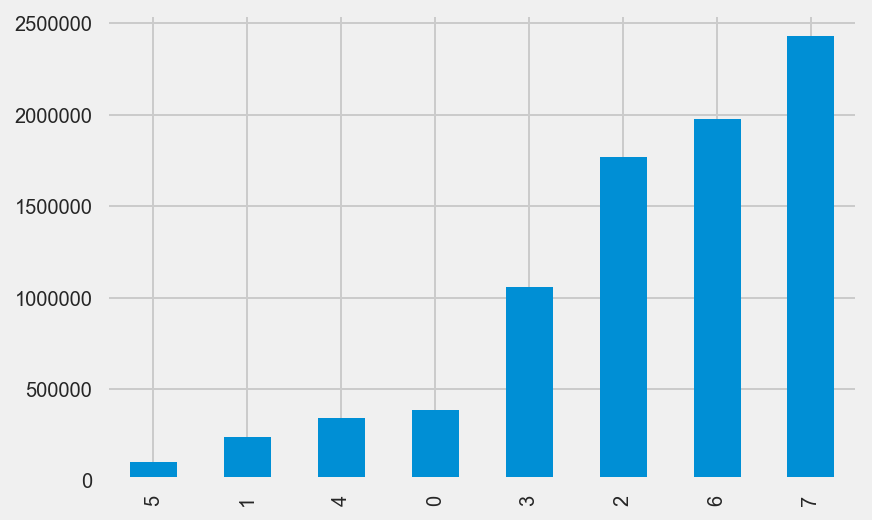

In [63]:
profits_per_type['profit_type'].plot(kind='bar')

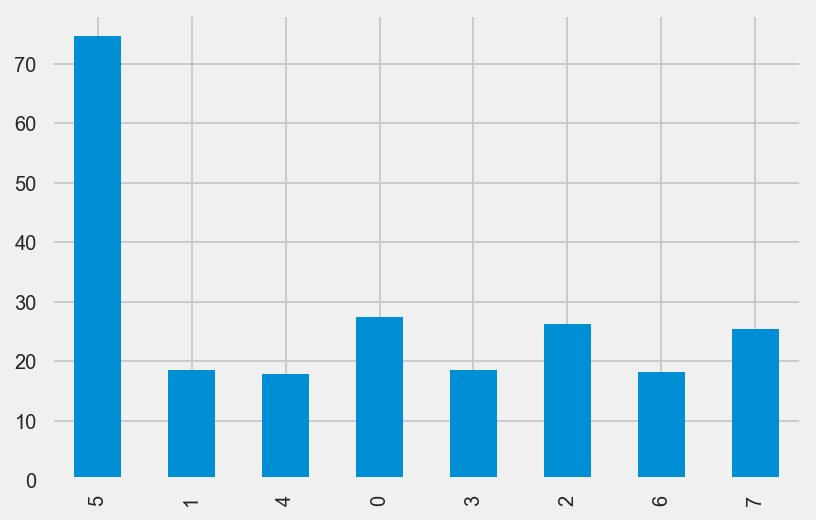

In [64]:
profits_per_type['profit_category_gl'].plot(kind='bar')

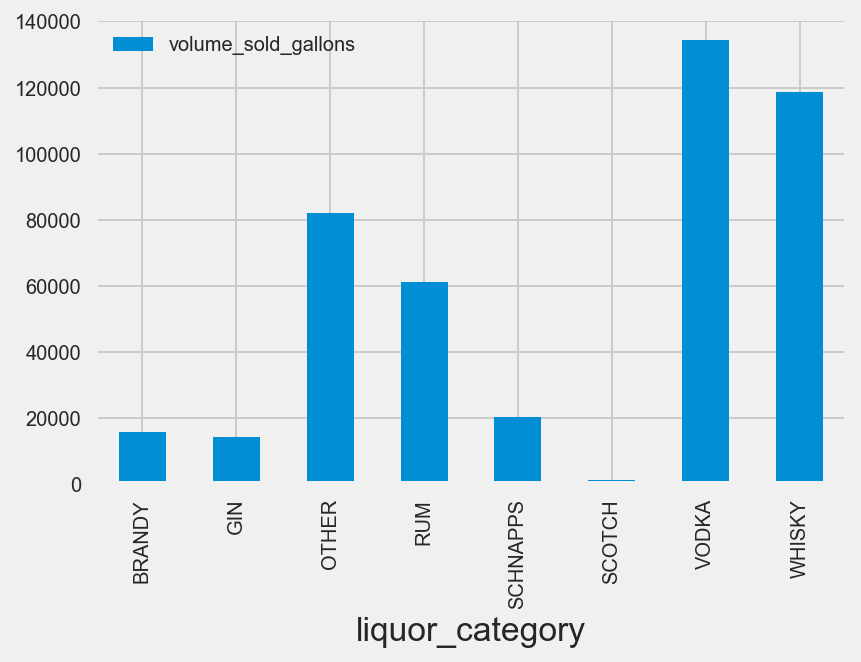

In [65]:
gallons_per_type.plot(kind='bar')

Scotch has the lowest sales in gallons and hence in dollars. But it has the highest per gallon profit margin compared 
to all other categories. On the other hand the largest selling drinks are Whisky and Vodka but both have 
average profit margins per gallon. I think the data supports the notion that the demand for rare drinks is lower
since its sold at premium prices and hence has a very high profit margin. The correlation coeeficient also 
supports this notion which is shown below.

In [66]:
print profits_per_type[['profit_category_gl','profit_type']].corr()

                    profit_category_gl  profit_type
profit_category_gl            1.000000    -0.353189
profit_type                  -0.353189     1.000000



### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

creating a column for brands of liquors by extracting characters from the item description column - the logic is 
that one brand can have different products but we are now concerned about the relationship between brands
and sales and profits for each brand. The way item description is given we can use just the first word from the
column to create brand since these names are unique.

In [67]:
df15['brand'] = df15['item_description'].str.extract('([A-Z]\w{0,})', expand=True)
df15.head(5)

,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,...,profit,profit_year,profit_per_gallon,profit_pergl_county,store_size,profit_to_size,liquor_category,profit_category_gl,profit_type,brand
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,27.00,3011.02,11.344538,21.029534,181.03,16.632713,BRANDY,27.39933,386749.67,Mr
1,2015-06-10,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,9.00,3011.02,11.392405,21.029534,181.03,16.632713,BRANDY,27.39933,386749.67,Mr
2,2015-11-04,3717,SUMNER,50674,9,Bremer,1051110,BLACKBERRY BRANDIES,55,55066,...,4.50,3011.02,11.250000,21.029534,181.03,16.632713,BRANDY,27.39933,386749.67,Mr
3,2015-03-04,3717,SUMNER,50674,9,Bremer,1051110,BLACKBERRY BRANDIES,434,55086,...,2.74,3011.02,13.700000,21.029534,181.03,16.632713,BRANDY,27.39933,386749.67,Paramount
4,2015-07-15,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,4.50,3011.02,11.250000,21.029534,181.03,16.632713,BRANDY,27.39933,386749.67,Mr


In [68]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217026 entries, 0 to 217025
Data columns (total 34 columns):
date                   217026 non-null datetime64[ns]
store_no               217026 non-null int64
city                   217026 non-null object
zip_code               217026 non-null object
county_no              217026 non-null int64
county                 217026 non-null object
category               217026 non-null int64
category_name          217026 non-null object
vendor_no              217026 non-null int64
item_no                217026 non-null int64
item_description       217026 non-null object
bottle_volume_ml       217026 non-null int64
state_bottle_cost      217026 non-null float64
state_bottle_retail    217026 non-null float64
bottles_sold           217026 non-null int64
sale_dollars           217026 non-null float64
volume_sold_liters     217026 non-null float64
volume_sold_gallons    217026 non-null float64
month_of_year          217026 non-null int64
year      

In [69]:
# creating a variable for annual sales per brand of liquor

sales_per_brand =df15.groupby(['brand']).mean()['sale_year'].reset_index()
sales_per_brand.rename(columns={
  'sale_year':'brandwise_sales'  
   }, inplace=True)
df15= pd.merge(df15, sales_per_brand, on=['brand'], how='right')

In [70]:
#creating a variable to calculate gross profit per brand of liquor 

profit_brand_name = df15.groupby(['brand']).sum()["profit_year"].reset_index()
profit_brand_name.rename(columns={
  'profit_year':'brandswise_profit'  
   }, inplace=True)
df15= pd.merge(df15, profit_brand_name, on=['brand'], how='right')


In [71]:
df15.head(5)

,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,...,profit_per_gallon,profit_pergl_county,store_size,profit_to_size,liquor_category,profit_category_gl,profit_type,brand,brandwise_sales,brandswise_profit
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,11.344538,21.029534,181.03,16.632713,BRANDY,27.39933,386749.67,Mr,60922.730391,6249177.73
1,2015-06-10,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,11.392405,21.029534,181.03,16.632713,BRANDY,27.39933,386749.67,Mr,60922.730391,6249177.73
2,2015-11-04,3717,SUMNER,50674,9,Bremer,1051110,BLACKBERRY BRANDIES,55,55066,...,11.250000,21.029534,181.03,16.632713,BRANDY,27.39933,386749.67,Mr,60922.730391,6249177.73
3,2015-07-15,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,11.250000,21.029534,181.03,16.632713,BRANDY,27.39933,386749.67,Mr,60922.730391,6249177.73
4,2015-12-08,2651,WAVERLY,50677,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,11.344538,21.029534,1462.15,17.304401,BRANDY,27.39933,386749.67,Mr,60922.730391,6249177.73


In [72]:
brandwise_sale_profit =df15.groupby(['brand']).mean()[['brandwise_sales', 'brandswise_profit']]


In [73]:
brandwise_sale_profit.sort(['brandswise_profit'], ascending=1, inplace=True)
print brandwise_sale_profit.head(20)

               brandwise_sales  brandswise_profit
brand                                            
Gioia                  5395.65            1804.56
Nuvo                   8416.48            2815.35
Caipirinha             9427.17            3143.12
Fettercairn            9427.17            3143.12
Apricot                9427.17            3143.12
...                        ...                ...
Grapefruit             9427.17            6286.24
Blair                  9427.17            6286.24
Craigellachie          9427.17            6286.24
Braeval                9427.17            6286.24
Cerises                9427.17            6286.24

[20 rows x 2 columns]


C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


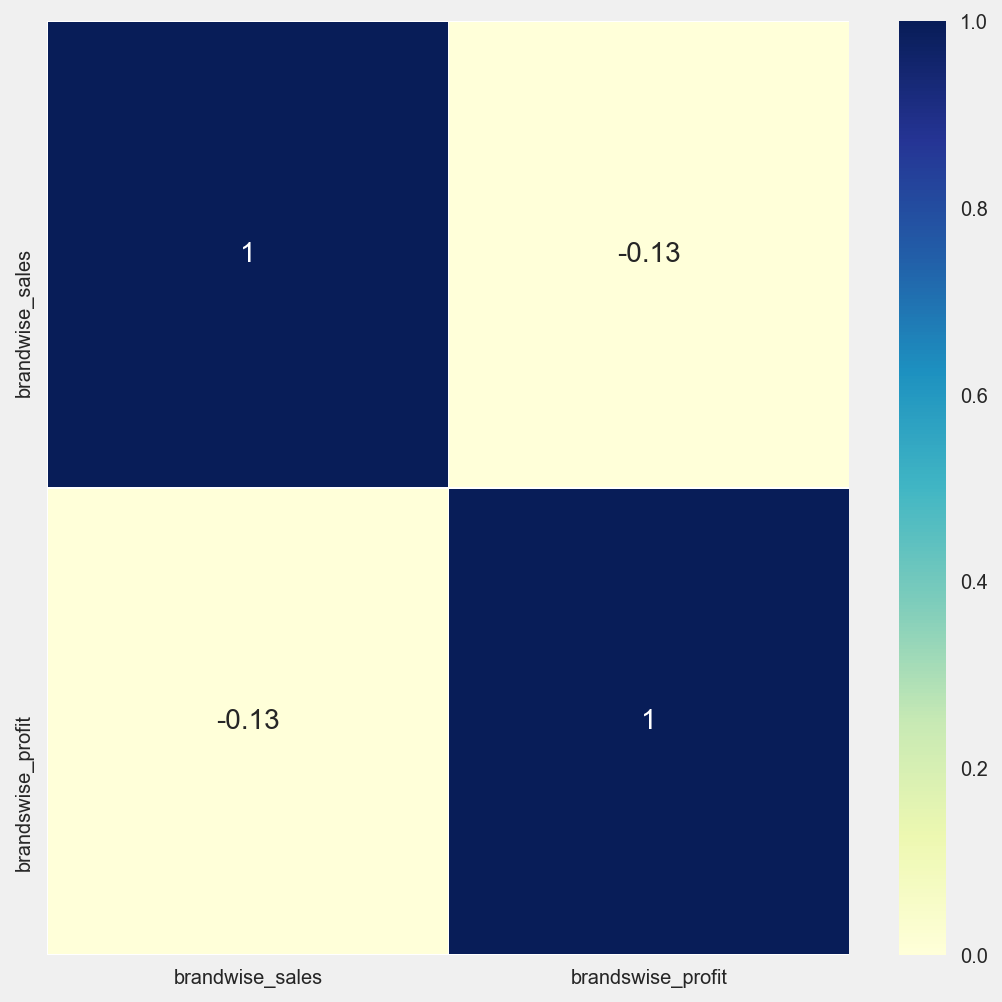

In [74]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
sns.heatmap(brandwise_sale_profit.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()


The previous tables and correlation matrix shows absence of any positive relation between a particular brand sales and profits

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

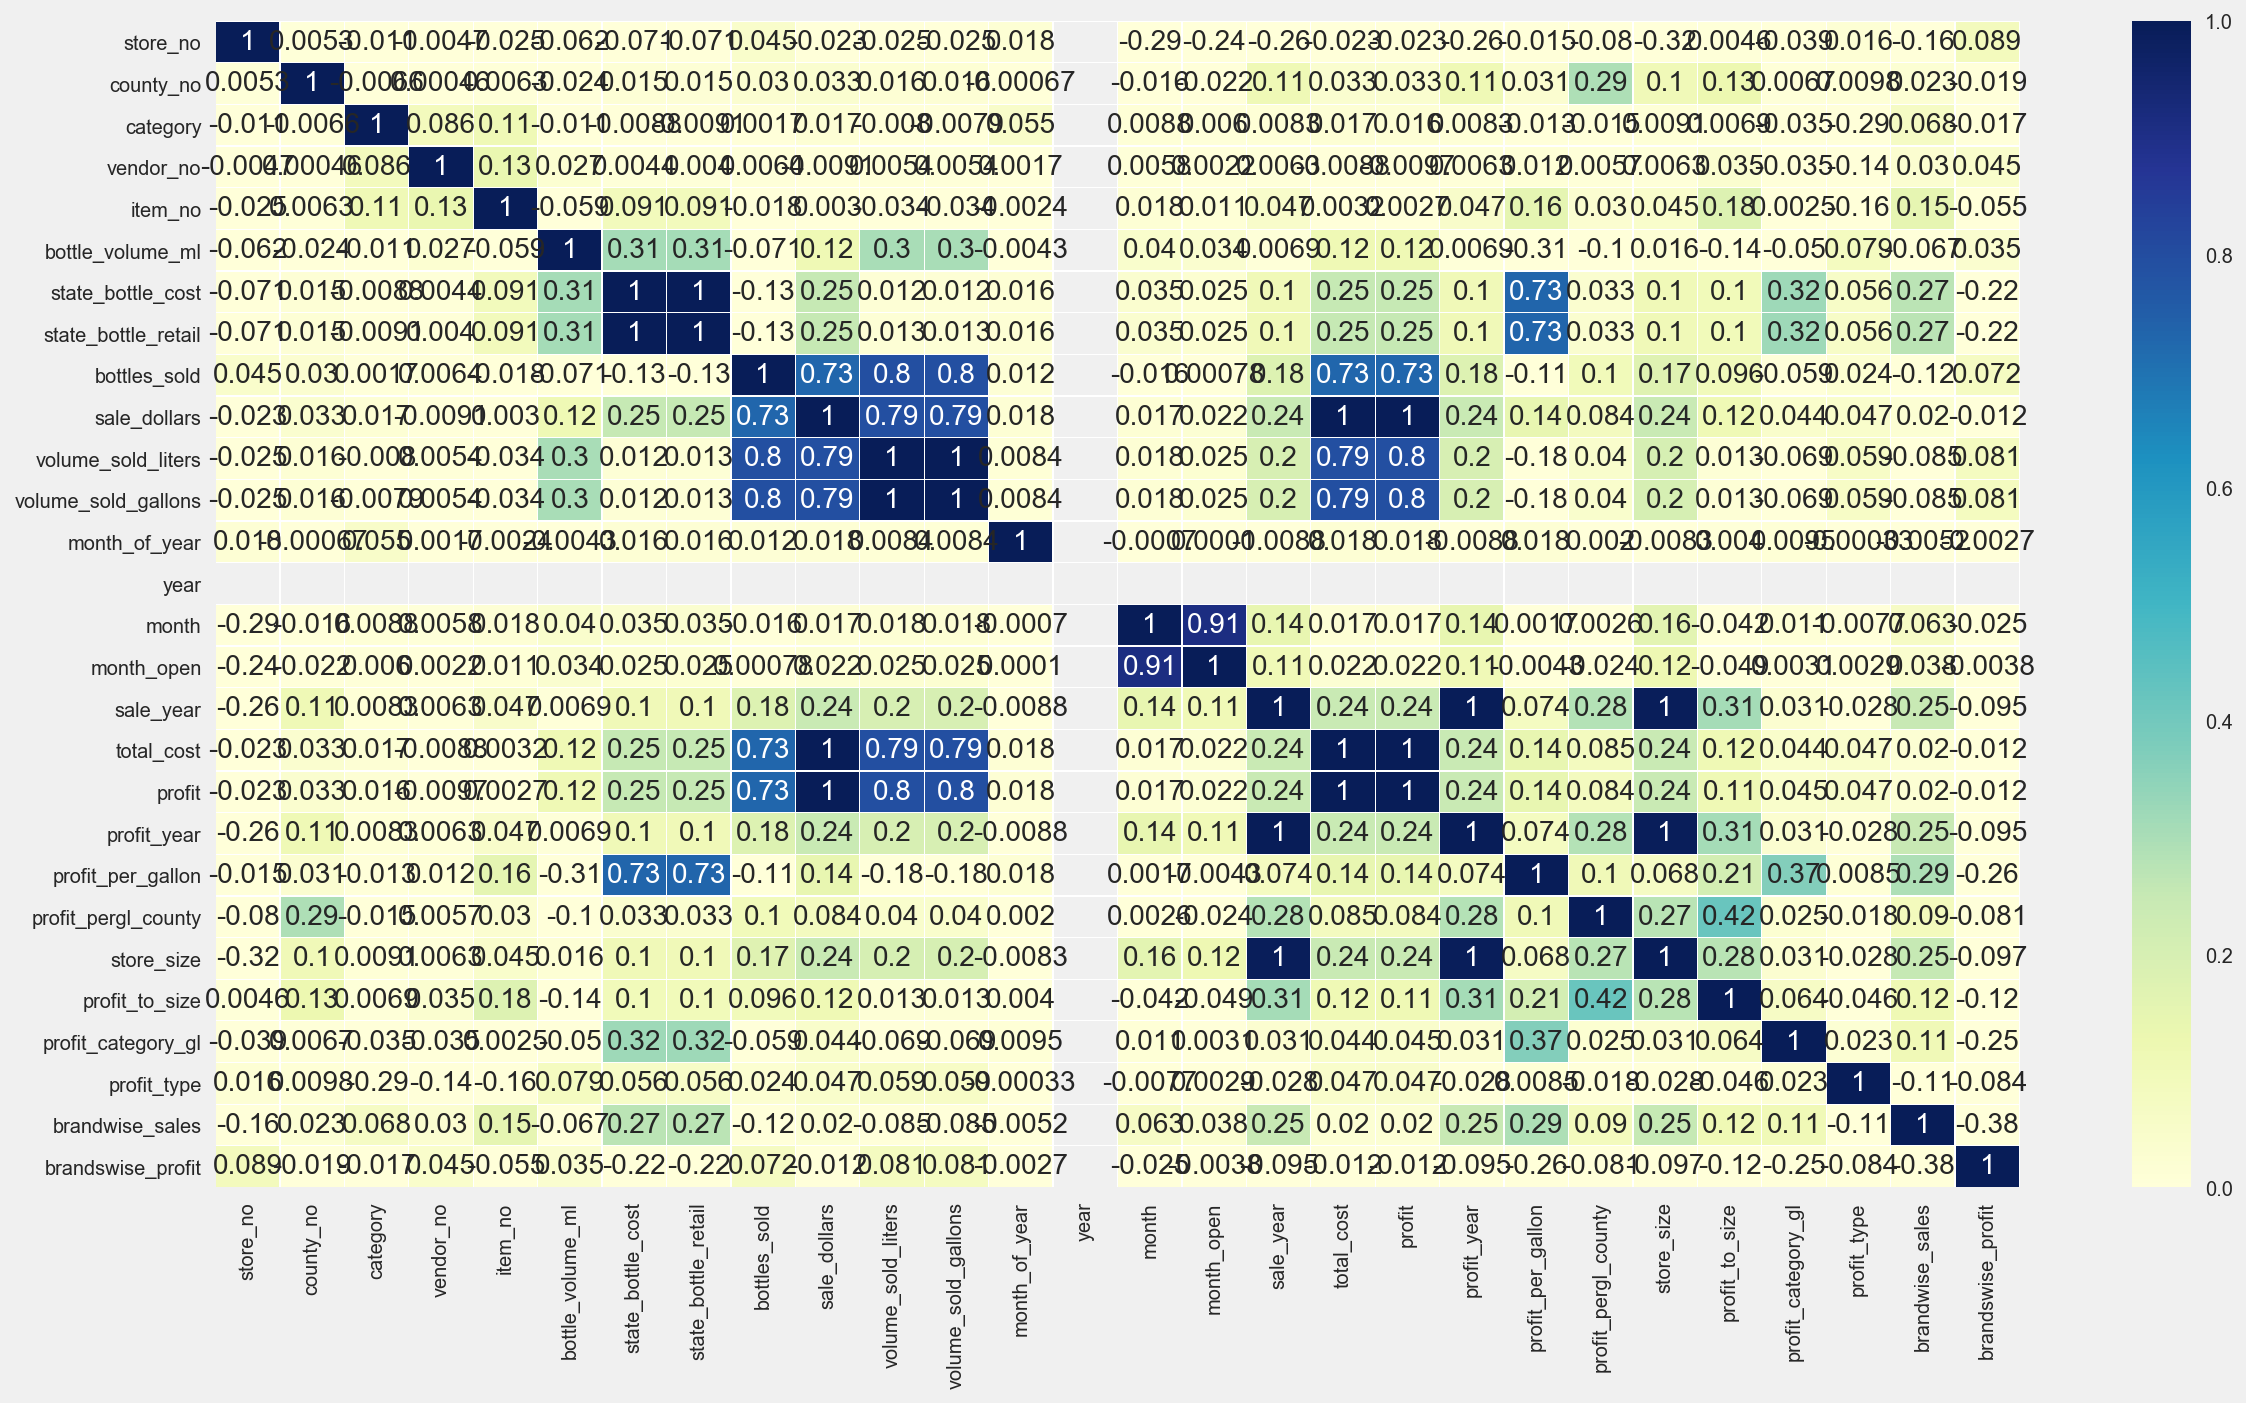

In [75]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(df15.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()


In [76]:
print profits_per_type.head(10)

  liquor_category   profit_type  profit_category_gl
5          SCOTCH  9.926186e+04           74.625325
1             GIN  2.379268e+05           18.470183
4        SCHNAPPS  3.413310e+05           17.906787
0          BRANDY  3.867497e+05           27.399330
3             RUM  1.060169e+06           18.554182
2           OTHER  1.767079e+06           26.319499
6           VODKA  1.977033e+06           18.230063
7          WHISKY  2.429726e+06           25.383205


Looking at the Liquor category wise profit/gallon and also the quantity sold and I would suggest a progressive taxation, where categories like Scotch, Vodka and Whisky will be taxed higher Scotch being the most highly taxed compared to other drinks. The reason is these categories are relatively costly and mostly big shops only will be able to stock such categories in high quantity. So instead of designing a tax policy based on store size or even specific counties for that matter, it would be better to tax the products that certain stores are selling so that small store owners wont have to carry higher burder of taxes.


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [77]:
#Creating a subset with only 2015 1st quarter data
df15_q1= dff[(dff['month'] == 1) |(dff['month'] == 2) |(dff['month'] == 3)]
df15_q1= df15_q1[(dff['year']!=2016) ]
#making sure that only 2015 first quarter observations are used
df15_q1.loc[df15_q1['year']==2016]

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month,year


In [78]:
#Creating sales column For 2015 1st quarter
df15_q1_sale=df15_q1.groupby(['store_no']).sum()['sale_dollars'].reset_index()
df15_q1_sale.rename(columns={
  'sale_dollars':'quaterly_sale15'  
   }, inplace=True)
dff= pd.merge(dff, df15_q1_sale, on=['store_no'], how='right')


In [79]:
#Creating a subset with only 2016 1st quarter data
df16_q1= dff[(dff['month'] == 1) |(dff['month'] == 2) |(dff['month'] == 3)]
df16_q1= df16_q1[(dff['year']!=2015) ]
#making sure that only 2016 first quarter observations are used
df16_q1.loc[df16_q1['year']==2015]

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,...,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month,year,quaterly_sale15


In [80]:
#Creating sales column For 2015 1st quarter
df16_q1_sale=df16_q1.groupby(['store_no']).sum()['sale_dollars'].reset_index()
df16_q1_sale.rename(columns={
  'sale_dollars':'quaterly_sale16'  
   }, inplace=True)
dff= pd.merge(dff, df16_q1_sale, on=['store_no'], how='right')


In [81]:
dff.head(5)

,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,...,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month,year,quaterly_sale15,quaterly_sale16
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,4.50,6.75,12,81.00,9.00,2.38,11,2015,1583.13,2510.46
1,2015-06-10,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,4.50,6.75,4,27.00,3.00,0.79,6,2015,1583.13,2510.46
2,2015-01-21,3717,SUMNER,50674,9,Bremer,1081900,PEPPERMINT SCHNAPPS,322,75211,...,10.00,15.00,2,30.00,1.50,0.40,1,2015,1583.13,2510.46
3,2015-11-11,3717,SUMNER,50674,9,Bremer,1012100,CANADIAN WHISKIES,115,11777,...,6.63,9.95,2,19.90,2.00,0.53,11,2015,1583.13,2510.46
4,2015-01-07,3717,SUMNER,50674,9,Bremer,1011200,STRAIGHT BOURBON WHISKIES,65,19476,...,16.79,25.19,1,25.19,0.75,0.20,1,2015,1583.13,2510.46


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

#Sorting the final dataset with respect to store number, year and month and dropping missing values

In [82]:
dff.sort(['store_no','year','month'], ascending=True)
df_q= dff.dropna()
df_q.isnull().sum()

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


date                   0
store_no               0
city                   0
zip_code               0
county_no              0
                      ..
volume_sold_gallons    0
month                  0
year                   0
quaterly_sale15        0
quaterly_sale16        0
dtype: int64

In [83]:
#Measuring quarterly sales growth

In [84]:
df_q['sales_growth']= ((df_q['quaterly_sale16'] - df_q['quaterly_sale15'])/df_q['quaterly_sale15'])*100
df_q.head(5)

,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,...,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month,year,quaterly_sale15,quaterly_sale16,sales_growth
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,6.75,12,81.00,9.00,2.38,11,2015,1583.13,2510.46,58.575733
1,2015-06-10,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,...,6.75,4,27.00,3.00,0.79,6,2015,1583.13,2510.46,58.575733
2,2015-01-21,3717,SUMNER,50674,9,Bremer,1081900,PEPPERMINT SCHNAPPS,322,75211,...,15.00,2,30.00,1.50,0.40,1,2015,1583.13,2510.46,58.575733
3,2015-11-11,3717,SUMNER,50674,9,Bremer,1012100,CANADIAN WHISKIES,115,11777,...,9.95,2,19.90,2.00,0.53,11,2015,1583.13,2510.46,58.575733
4,2015-01-07,3717,SUMNER,50674,9,Bremer,1011200,STRAIGHT BOURBON WHISKIES,65,19476,...,25.19,1,25.19,0.75,0.20,1,2015,1583.13,2510.46,58.575733


The average sales and growth range is big so I am setting a criteria which is if the quarterly sales is greater than
30000 dollars and the quarterly growth is more than 35% then that would be an ideal location to start the business

In [85]:
pd.set_option('display.max_rows', 10)
dff_q = df_q.loc[(df_q['quaterly_sale16']>30000) & (df_q['sales_growth']>35)]
dff_q.sort(['sales_growth'], ascending=False)

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,...,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month,year,quaterly_sale15,quaterly_sale16,sales_growth
177497,2015-02-19,5102,MOUNT VERNON,52314,57,Linn,1041100,AMERICAN DRY GINS,434,31658,...,10.67,2,21.34,3.50,0.92,2,2015,25157.04,45362.52,80.317398
176920,2015-02-12,5102,MOUNT VERNON,52314,57,Linn,1031080,VODKA 80 PROOF,380,37338,...,16.49,2,32.98,3.50,0.92,2,2015,25157.04,45362.52,80.317398
176944,2015-08-27,5102,MOUNT VERNON,52314,57,Linn,1022100,TEQUILA,410,88296,...,40.50,24,972.00,18.00,4.76,8,2015,25157.04,45362.52,80.317398
176943,2015-03-19,5102,MOUNT VERNON,52314,57,Linn,1022100,TEQUILA,65,89796,...,21.26,3,63.78,2.25,0.59,3,2015,25157.04,45362.52,80.317398
176942,2015-09-24,5102,MOUNT VERNON,52314,57,Linn,1011100,BLENDED WHISKIES,260,25608,...,17.94,6,107.64,10.50,2.77,9,2015,25157.04,45362.52,80.317398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10159,2016-02-08,2670,CORALVILLE,52241,52,Johnson,1062310,SPICED RUM,259,43028,...,17.33,66,1143.78,115.50,30.51,2,2016,40125.22,54522.71,35.881398
10160,2016-02-29,2670,CORALVILLE,52241,52,Johnson,1051010,AMERICAN GRAPE BRANDIES,115,53206,...,9.90,12,118.80,9.00,2.38,2,2016,40125.22,54522.71,35.881398
10161,2015-11-11,2670,CORALVILLE,52241,52,Johnson,1081600,WHISKEY LIQUEUR,421,64866,...,13.47,36,484.92,27.00,7.13,11,2015,40125.22,54522.71,35.881398
10162,2015-06-30,2670,CORALVILLE,52241,52,Johnson,1041100,AMERICAN DRY GINS,380,31719,...,6.57,12,78.84,12.00,3.17,6,2015,40125.22,54522.71,35.881398


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

Based on my criteria LINN is a good location to start the business

In [86]:
pd.set_option('display.max_rows', 10)
dff_q.sort(['sales_growth'], ascending=False)

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,date,store_no,city,zip_code,county_no,county,category,category_name,vendor_no,item_no,...,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month,year,quaterly_sale15,quaterly_sale16,sales_growth
177497,2015-02-19,5102,MOUNT VERNON,52314,57,Linn,1041100,AMERICAN DRY GINS,434,31658,...,10.67,2,21.34,3.50,0.92,2,2015,25157.04,45362.52,80.317398
176920,2015-02-12,5102,MOUNT VERNON,52314,57,Linn,1031080,VODKA 80 PROOF,380,37338,...,16.49,2,32.98,3.50,0.92,2,2015,25157.04,45362.52,80.317398
176944,2015-08-27,5102,MOUNT VERNON,52314,57,Linn,1022100,TEQUILA,410,88296,...,40.50,24,972.00,18.00,4.76,8,2015,25157.04,45362.52,80.317398
176943,2015-03-19,5102,MOUNT VERNON,52314,57,Linn,1022100,TEQUILA,65,89796,...,21.26,3,63.78,2.25,0.59,3,2015,25157.04,45362.52,80.317398
176942,2015-09-24,5102,MOUNT VERNON,52314,57,Linn,1011100,BLENDED WHISKIES,260,25608,...,17.94,6,107.64,10.50,2.77,9,2015,25157.04,45362.52,80.317398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10159,2016-02-08,2670,CORALVILLE,52241,52,Johnson,1062310,SPICED RUM,259,43028,...,17.33,66,1143.78,115.50,30.51,2,2016,40125.22,54522.71,35.881398
10160,2016-02-29,2670,CORALVILLE,52241,52,Johnson,1051010,AMERICAN GRAPE BRANDIES,115,53206,...,9.90,12,118.80,9.00,2.38,2,2016,40125.22,54522.71,35.881398
10161,2015-11-11,2670,CORALVILLE,52241,52,Johnson,1081600,WHISKEY LIQUEUR,421,64866,...,13.47,36,484.92,27.00,7.13,11,2015,40125.22,54522.71,35.881398
10162,2015-06-30,2670,CORALVILLE,52241,52,Johnson,1041100,AMERICAN DRY GINS,380,31719,...,6.57,12,78.84,12.00,3.17,6,2015,40125.22,54522.71,35.881398


### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [87]:
#creating categories of liquor in the main dataset
dff['liquor_category'] = np.where(dff['category_name'].str.contains('BRANDIES') , "BRANDY",
            np.where(dff['category_name'].str.contains('WHISKIES'), "WHISKY",
            np.where(dff['category_name'].str.contains('SCHNAPPS'), "SCHNAPPS",  
            np.where(dff['category_name'].str.contains('SCOTCH'), "SCOTCH",
            np.where(dff['category_name'].str.contains('GINS'), "GIN",
            np.where(dff['category_name'].str.contains('VODKA'), "VODKA",
            np.where(dff['category_name'].str.contains('RUM'), "RUM", "OTHER" )))))))
print dff.groupby(['liquor_category']).count()['category'].reset_index()

  liquor_category  category
0          BRANDY     14164
1             GIN      9439
2           OTHER     51851
3             RUM     31268
4        SCHNAPPS     14643
5          SCOTCH      2216
6           VODKA     66217
7          WHISKY     67423


In [88]:
dff['total_cost']=dff['state_bottle_cost']*dff['bottles_sold']
dff['profit']= dff['sale_dollars']- dff['total_cost']

In [89]:
#creating a subset which has county wise and liquor category wise profits 
dff_county_type_profit=dff.groupby([dff['county'], dff['liquor_category']]).mean()["profit"].reset_index()
dff_county_type_profit.rename(columns={
  'profit':'county_liquor_profit'  
   }, inplace=True)
dff= pd.merge(dff, dff_county_type_profit, on=['county','liquor_category'], how='right')

In [90]:
pd.set_option('display.max_rows', 10)
dff_county_type_profit.sort(['county_liquor_profit'], ascending=False )

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,county,liquor_category,county_liquor_profit
126,Cherokee,SCOTCH,100.000000
25,Audubon,RUM,79.500000
24,Audubon,OTHER,78.000000
584,Polk,SCOTCH,76.702775
303,Hancock,SCOTCH,73.245000
...,...,...,...
431,Louisa,GIN,7.208333
662,Taylor,SCHNAPPS,7.170909
393,Jones,GIN,6.956000
189,Davis,SCOTCH,6.510000


In [91]:
dff_county_type_profit.loc[dff_county_type_profit['county']=='Cherokee'].sort(['county_liquor_profit'], ascending=False)

C:\Users\Shiv\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,county,liquor_category,county_liquor_profit
126,Cherokee,SCOTCH,100.000000
128,Cherokee,WHISKY,44.547363
123,Cherokee,OTHER,36.701538
124,Cherokee,RUM,35.320125
127,Cherokee,VODKA,26.295448
125,Cherokee,SCHNAPPS,23.515789
121,Cherokee,BRANDY,21.480667
122,Cherokee,GIN,19.878462


#Based on the above data I would suggest if the owner is selling only one/limited liquor type then he can get
#maximum returns by selling Scotch and Whisky in Cherokee county